# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 64.7 MB/s eta 0:00:01    |████████████▌                   | 7.5 MB 64.7 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 55.4 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 6.7 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 64.6 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 61.7 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 58.6 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 42.7 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 62.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 57.0 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 52.4 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 10.9 MB/s eta 0:00:01
     |████████████████████

     |████████████████████████████████| 93 kB 2.3 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=d53c3a6f609211ef4d81ca8133203654bf62c4b88aee3104919132530c71ba3d
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.


## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor()])

# Create training set and define training dataloader
training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)
valid_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)

# Create test set and define test dataloader
train_loader = DataLoader(training_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100)
valid_loader = DataLoader(valid_data, batch_size=100)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

First, I converted to a pytorch tensor, because it is the standard input for a pytorch model. I didn't normalized it, because it will be flattened, so it will all be in a one dimension tensor. Finally, I didn't flattened it already, because I will add a flatten layer on the model. 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T, cmap = 'gray')
        plt.show()

2


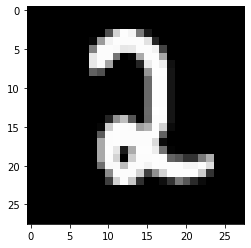

4


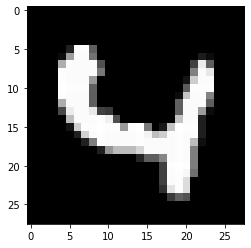

8


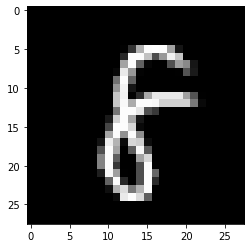

9


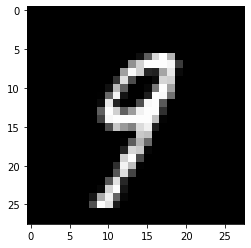

7


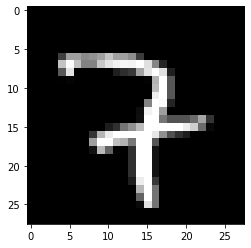

In [5]:
# Explore data
show5(train_loader)

In [6]:
# checked the dimensions of the tensors 
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.output = F.log_softmax
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.output(self.fc3(x), dim=1)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
#loss and opt
mlp = MNIST_MLP()
mlp.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr= 0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
def train_network_classification(net, criterion, optimizer, train_loader, test_loader):
    num_epochs = 20
    
    # Establish a list for our history
    train_loss_history = list()
    val_loss_history = list()

    for epoch in range(num_epochs):
        net.train()
        train_loss = 0.0
        train_correct = 0
        for i, data in enumerate(train_loader):
            # data is a list of [inputs, labels]
            inputs, labels = data
            
            # Pass to GPU if available.
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            _, preds = torch.max(outputs.data, 1)
            train_correct += (preds == labels).sum().item()
            train_loss += loss.item()
        print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
        train_loss_history.append(train_loss)

        
        val_loss = 0.0
        val_correct = 0
        net.eval()
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
        
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            
            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()
        print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
        val_loss_history.append(val_loss)           

    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.legend()
    plt.show()

Plot the training loss (and validation loss/accuracy, if recorded).

Epoch 1 training accuracy: 88.90% training loss: 0.39772
Epoch 1 validation accuracy: 94.52% validation loss: 0.18791
Epoch 2 training accuracy: 95.18% training loss: 0.16700
Epoch 2 validation accuracy: 95.89% validation loss: 0.13673
Epoch 3 training accuracy: 96.47% training loss: 0.11759
Epoch 3 validation accuracy: 96.72% validation loss: 0.11069
Epoch 4 training accuracy: 97.36% training loss: 0.08904
Epoch 4 validation accuracy: 96.95% validation loss: 0.09877
Epoch 5 training accuracy: 97.78% training loss: 0.07334
Epoch 5 validation accuracy: 97.23% validation loss: 0.09077
Epoch 6 training accuracy: 98.17% training loss: 0.05884
Epoch 6 validation accuracy: 97.37% validation loss: 0.08838
Epoch 7 training accuracy: 98.50% training loss: 0.04833
Epoch 7 validation accuracy: 97.15% validation loss: 0.09186
Epoch 8 training accuracy: 98.74% training loss: 0.04126
Epoch 8 validation accuracy: 97.43% validation loss: 0.08447
Epoch 9 training accuracy: 99.00% training loss: 0.03271

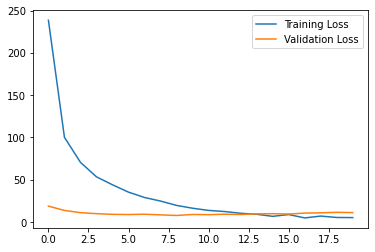

In [10]:
train_network_classification(mlp, criterion, optimizer, train_loader, test_loader)

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [12]:
#test and eval
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = mlp(images)
        #value_index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100 *n_correct/n_samples
    print(f'Acccuracy: {acc} %')

Acccuracy: 97.67 %


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

Epoch 1 training accuracy: 99.91% training loss: 0.00373
Epoch 1 validation accuracy: 97.85% validation loss: 0.10207
Epoch 2 training accuracy: 99.96% training loss: 0.00240
Epoch 2 validation accuracy: 97.88% validation loss: 0.10124
Epoch 3 training accuracy: 99.98% training loss: 0.00198
Epoch 3 validation accuracy: 97.86% validation loss: 0.10093
Epoch 4 training accuracy: 99.99% training loss: 0.00172
Epoch 4 validation accuracy: 97.88% validation loss: 0.10066
Epoch 5 training accuracy: 99.99% training loss: 0.00154
Epoch 5 validation accuracy: 97.87% validation loss: 0.10048
Epoch 6 training accuracy: 100.00% training loss: 0.00142
Epoch 6 validation accuracy: 97.91% validation loss: 0.10045
Epoch 7 training accuracy: 100.00% training loss: 0.00132
Epoch 7 validation accuracy: 97.91% validation loss: 0.10053
Epoch 8 training accuracy: 100.00% training loss: 0.00125
Epoch 8 validation accuracy: 97.89% validation loss: 0.10050
Epoch 9 training accuracy: 100.00% training loss: 0.0

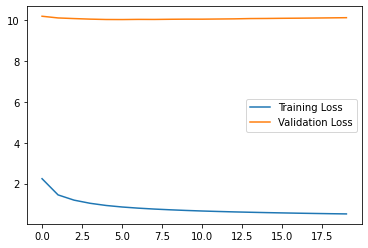

In [13]:
#changed optimizer and learning rate
optimizer = torch.optim.SGD(mlp.parameters(), lr= 0.01)
train_network_classification(mlp, criterion, optimizer, train_loader, test_loader)

In [14]:
#test and eval
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = mlp(images)
        #value_index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100 *n_correct/n_samples
    print(f'Acccuracy: {acc} %')

Acccuracy: 97.95 %


## Saving your model
Using `torch.save`, save your model for future loading.

In [15]:
torch.save(mlp, "model")